# Sentiment analysis
The script aims to explore the datasets

- Sentiment_chatgptfirst.csv ("datasets/sentiment_chatgptfirst.csv")
- Sentiment_chatgpt2last.csv ("datasets/sentiment_chatgpt2last.csv")

in order to visualize features and to make some conclusion

### TO-DO:
use negative and positive tweets. discard neutral. there are too many neutrals. 
Section for negative (frequence, frequent words, topic)
Section for positive (''')

### Sentiment_chatgptfirst analysis 

In [1]:
#load data
import pandas as pd

df = pd.read_csv('datasets/sentiment_chatgptfirst.csv')
df.head()

,Unnamed: 0,tweets,label
0,0,chatgpt optimizing language models dialogue op...,negativ
1,1,try talking chatgpt new optimized dialogue fee...,positiv
2,2,chatgpt optimizing language models dialogue ma...,positiv
3,3,thrilled share chatgpt new model optimized dia...,neutral
4,4,minutes ago openai released new chatgpt nnand ...,neutral


In [2]:
type(df)

pandas.core.frame.DataFrame

In [3]:
sentiments = df.label

In [4]:
sentiments.value_counts()

negativ    87969
neutral    69656
positiv    61655
Name: label, dtype: int64

In [5]:
# save all the negativ values in a list and count them
negatives = []
positives = []
neutrals = []
for i in range(len(sentiments)):
    if sentiments[i] == 'negativ':
        negatives.append(sentiments[i])
    elif sentiments[i] == 'positiv':
        positives.append(sentiments[i])
    else:
        neutrals.append(sentiments[i])

print(len(negatives))
print(len(positives))
print(len(neutrals))


87969
61655
69656


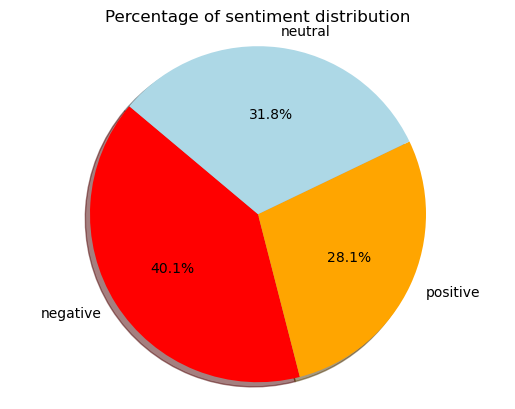

In [6]:
#plot the proportion of sentiments
import matplotlib.pyplot as plt 

labels = ['negative', 'positive', 'neutral']
sizes = [len(negatives), len(positives), len(neutrals)]
colors = ['red', 'orange', 'lightblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)    
plt.axis('equal')
plt.title('Percentage of sentiment distribution')
plt.show()



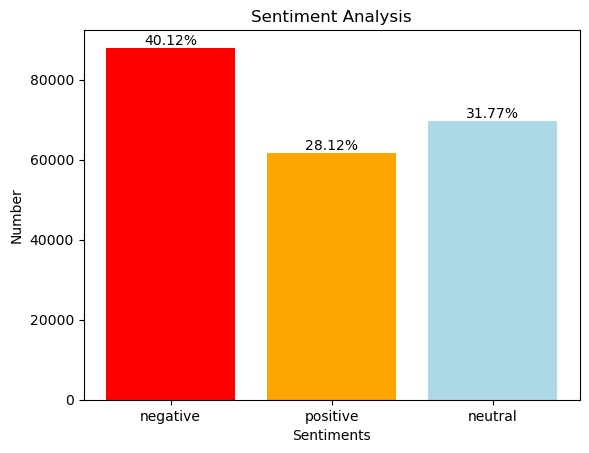

In [9]:
# histogram
import matplotlib.pyplot as plt

labels = ['negative', 'positive', 'neutral']
sizes = [len(negatives), len(positives), len(neutrals)]
colors = ['red', 'orange', 'lightblue']

plt.bar(labels, sizes, color=colors)
#add the percentage of each sentiment in the bars
for i in range(len(sizes)):
    plt.text(i, sizes[i], str(round((sizes[i]/len(sentiments))*100, 2)) + '%', ha='center', va='bottom')    
    
plt.xlabel('Sentiments')
plt.ylabel('Number')
plt.title('Sentiment Analysis')
plt.show()


### WordCloud

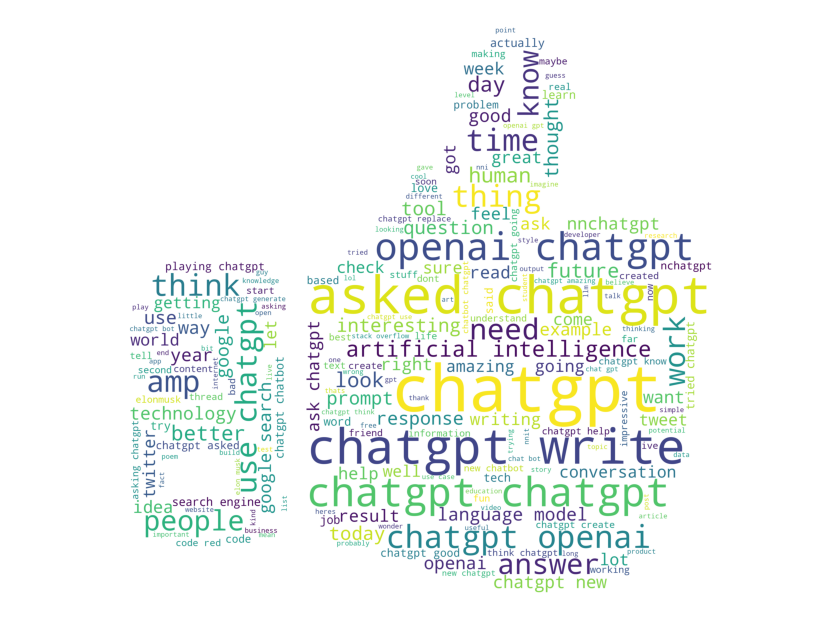

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
 
comment_words = ''
stopwords = set(STOPWORDS)
 

for val in df.tweets:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
    
    # Remove repeated words
    tokens = list(dict.fromkeys(tokens))

    # # Converts each token into lowercase
    # for i in range(len(tokens)):
    #     tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
mask = np.array(Image.open("/Users/barbararuvolo/Desktop/EPFL/Digital Musicology/computational-social-media/wordcloud_images/upvote.png"))

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10, mask=mask).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [41]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string
import re

#frequency of each word
def word_frequency(text):
    # Create a list of words
    val = str(text)
    words = val.split()
    # Remove punctuation
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in words]
    # Remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # Filter out stopwords
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    
    # Count frequency of words
    frequency = nltk.FreqDist(words)
    return frequency

In [42]:
freq = word_frequency(df.tweets)
print(len(freq))

45


In [43]:
top_10 = freq.most_common(10)
print(top_10)

[('chatgpt', 10), ('dialogue', 3), ('new', 3), ('optimizing', 2), ('language', 2), ('models', 2), ('optimized', 2), ('op', 1), ('try', 1), ('talking', 1)]


### Plot of top 10 most common word

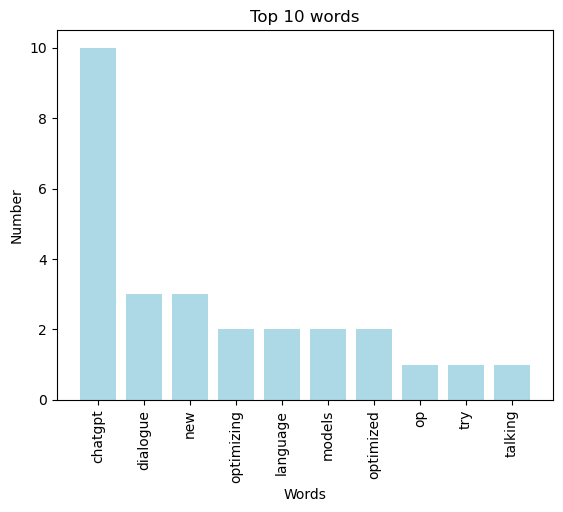

In [44]:
#plot the top 20 words 
import matplotlib.pyplot as plt

labels = []
sizes = []
for i in range(len(top_10)):
    labels.append(top_10[i][0])
    sizes.append(top_10[i][1])

plt.bar(labels, sizes, color='lightblue')
plt.xlabel('Words')
plt.ylabel('Number')
plt.title('Top 10 words')
plt.xticks(rotation=90)
plt.show()


### Topic analysis

In [7]:
#tokenize the tweets
import nltk
from nltk.tokenize import word_tokenize


token =df.tweets.apply(lambda x: nltk.word_tokenize(x))


### TF-IDF embedding

In [8]:
from gensim.corpora import Dictionary
from gensim.models import TfidfModel

#Create a dictionary
dictionary = Dictionary(token)
corpus = [dictionary.doc2bow(text) for text in token]

model = TfidfModel(corpus)
tfidf_corpus = model[corpus]

In [9]:
from gensim.models.ldamodel import LdaModel
coherence_scores = []
num_topics_list = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

for num_topics in num_topics_list:
    lda_model = LdaModel(
        corpus=tfidf_corpus,
        id2word=dictionary,
        alpha='auto',
        eta='auto',
        passes=10,
        iterations=500,
        eval_every=None,
        random_state=12345,
        num_topics=num_topics # change this parameter based on the number of topics you want to extract
        )

KeyboardInterrupt: 

In [51]:
top_topics = lda_model.top_topics(corpus=tfidf_corpus, texts=token, coherence='c_v', topn=20)

In [53]:
top_topics

[([(0.0054243137, 'bigdata'),
   (0.005234363, 'defeated'),
   (0.005233401, 'thank'),
   (0.004283871, 'lol'),
   (0.0042607943, 'thinking'),
   (0.0041122613, 'iphone'),
   (0.0040950635, 'thoughts'),
   (0.003823198, 'techcrunch'),
   (0.0036791347, 'heard'),
   (0.0036474897, 'fourth'),
   (0.0034927577, 'political'),
   (0.0032736084, 'master'),
   (0.0032667862, 'innovation'),
   (0.0032276325, 'case'),
   (0.003176385, 'chrome'),
   (0.0031462188, 'learned'),
   (0.0029982545, 'save'),
   (0.0029017807, 'trending'),
   (0.0028834315, 'law'),
   (0.002797993, 'kids')],
  0.49717907244356885),
 ([(0.016135542, 'youtube'),
   (0.008831239, 'cheating'),
   (0.008224929, 'engine'),
   (0.008098719, 'christmas'),
   (0.0042956984, 'musk'),
   (0.004081425, 'detect'),
   (0.0040806485, 'predictions'),
   (0.0035838007, 'hack'),
   (0.0034951211, 'api'),
   (0.0032841875, 'github'),
   (0.003262443, 'guess'),
   (0.0032210196, 'similar'),
   (0.0032184024, 'issues'),
   (0.0030641623, '